In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
df = pd.read_csv('/Users/thomasguerin/Desktop/FinalDataV3.csv')

# <center> **KNN Clustering** <center>

In [28]:
KNNDATA = pd.read_csv('/Users/thomasguerin/Desktop/FinalDataV3.csv')

In [29]:
# KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import LeaveOneOut


X = KNNDATA.drop('class', axis=1)
y = KNNDATA['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

train_accuracy_knn = knn.score(X_train, y_train)
test_accuracy_knn = knn.score(X_test, y_test)
print('Train accuracy:', train_accuracy_knn)
print('Test accuracy:', test_accuracy_knn)

# LOOCV because it's a small dataset 
loocv_knn = LeaveOneOut()
loocv_scores_knn = []

for train_index, test_index in loocv_knn.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    loocv_scores_knn.append(knn.score(X_test, y_test))

loocv_mean_score_knn = sum(loocv_scores_knn) / len(loocv_scores_knn)
print(f'LOOCV Mean Accuracy (KNN): {loocv_mean_score_knn:.4f}')


[[43  4]
 [16 38]]
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        47
           1       0.90      0.70      0.79        54

    accuracy                           0.80       101
   macro avg       0.82      0.81      0.80       101
weighted avg       0.82      0.80      0.80       101

Train accuracy: 0.8808510638297873
Test accuracy: 0.801980198019802
LOOCV Mean Accuracy (KNN): 0.8363


In [30]:
# try different metrics for k means 
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# train and test accuracies
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
print('Train accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)


[[1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Train accuracy: 0.8985074626865671
Test accuracy: 1.0


In [31]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
print('Train accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)



[[1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Train accuracy: 0.8776119402985074
Test accuracy: 1.0


In [32]:
knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
print('Train accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)



[[1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Train accuracy: 0.8805970149253731
Test accuracy: 1.0


In [33]:
X_train = np.ascontiguousarray(X_train)
y_train = np.ascontiguousarray(y_train)
X_test = np.ascontiguousarray(X_test)
y_test = np.ascontiguousarray(y_test)

knn = KNeighborsClassifier(n_neighbors=10, metric='cosine')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# train and test accuracies
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
print('Train accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)



[[1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Train accuracy: 0.8597014925373134
Test accuracy: 1.0


# <center> **Support Vector Machine** <center>

In [34]:
SVMDATA = pd.read_csv('/Users/thomasguerin/Desktop/FinalDataV3.csv')

In [35]:
from sklearn.svm import SVC


X_SVM = SVMDATA.drop('class', axis=1)
y_SVM = SVMDATA['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_classifier = SVC(kernel='linear')  # linear(GOOD) rbf(MEH), poly(77 - 76), sigmoid(72-66)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

train_accuracy_svm = svm_classifier.score(X_train, y_train)
test_accuracy_svm = svm_classifier.score(X_test, y_test)
print('Train accuracy:', train_accuracy_svm)
print('Test accuracy:', test_accuracy_svm)

loocv = LeaveOneOut()
loocv_scores = []
for train_index, test_index in loocv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    svm_classifier.fit(X_train, y_train)

    y_pred = svm_classifier.predict(X_test)

    loocv_scores.append(svm_classifier.score(X_test, y_test))

loocv_mean_score = sum(loocv_scores) / len(loocv_scores)
print(f'LOOCV Mean Accuracy: {loocv_mean_score:.4f}')




[[44  3]
 [12 42]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.85        47
           1       0.93      0.78      0.85        54

    accuracy                           0.85       101
   macro avg       0.86      0.86      0.85       101
weighted avg       0.86      0.85      0.85       101

Train accuracy: 0.8425531914893617
Test accuracy: 0.8514851485148515


LOOCV Mean Accuracy: 0.8244


# Random Forest

In [36]:
RANDOMDATA = pd.read_csv('/Users/thomasguerin/Desktop/FinalDataV3.csv')

In [37]:
from sklearn.ensemble import RandomForestClassifier

X = RANDOMDATA.drop('class', axis=1)
y = RANDOMDATA['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

train_accuracy_rf = rf_classifier.score(X_train, y_train)
test_accuracy_rf = rf_classifier.score(X_test, y_test)
print('Train accuracy:', train_accuracy_rf)
print('Test accuracy:', test_accuracy_rf)

loocv_rf = LeaveOneOut()
loocv_scores_rf = []

for train_index, test_index in loocv_rf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    loocv_scores_rf.append(rf_classifier.score(X_test, y_test))

loocv_mean_score_rf = sum(loocv_scores_rf) / len(loocv_scores_rf)
print(f'LOOCV Mean Accuracy (Random Forest): {loocv_mean_score_rf:.4f}')

[[43  4]
 [11 43]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        47
           1       0.91      0.80      0.85        54

    accuracy                           0.85       101
   macro avg       0.86      0.86      0.85       101
weighted avg       0.86      0.85      0.85       101

Train accuracy: 1.0
Test accuracy: 0.8514851485148515
LOOCV Mean Accuracy (Random Forest): 0.8899


# <center> **Bothering Bayes** <center>

In [38]:
BAYESDATA = pd.read_csv('/Users/thomasguerin/Desktop/FinalDataV3.csv')

In [39]:
from sklearn.naive_bayes import GaussianNB

X = BAYESDATA.drop('class', axis=1)
y = BAYESDATA['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gaussian_nb = GaussianNB()

gaussian_nb.fit(X_train, y_train)

y_pred = gaussian_nb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

train_accuracy_bayes = gaussian_nb.score(X_train, y_train)
test_accuracy_bayes = gaussian_nb.score(X_test, y_test)
print('Train accuracy:', train_accuracy_bayes)
print('Test accuracy:', test_accuracy_bayes)

loocv_bayes = LeaveOneOut()
loocv_scores_bayes = []

for train_index, test_index in loocv_bayes.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    gaussian_nb.fit(X_train, y_train)
    y_pred = gaussian_nb.predict(X_test)
    loocv_scores_bayes.append(gaussian_nb.score(X_test, y_test))

loocv_mean_score_bayes = sum(loocv_scores_bayes) / len(loocv_scores_bayes)
print(f'LOOCV Mean Accuracy (Gaussian Naive Bayes): {loocv_mean_score_bayes:.4f}')

Confusion Matrix:
[[42  5]
 [17 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        47
           1       0.88      0.69      0.77        54

    accuracy                           0.78       101
   macro avg       0.80      0.79      0.78       101
weighted avg       0.80      0.78      0.78       101

Train accuracy: 0.7617021276595745
Test accuracy: 0.7821782178217822
LOOCV Mean Accuracy (Gaussian Naive Bayes): 0.7619


# <center> **Logistic Regression** <center>

In [40]:
REGDATA = pd.read_csv('/Users/thomasguerin/Desktop/FinalDataV3.csv')


In [41]:
from sklearn.linear_model import LogisticRegression

X = REGDATA.drop('class', axis=1)
y = REGDATA['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=10000)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

train_accuracy_lr = log_reg.score(X_train, y_train)
test_accuracy_lr = log_reg.score(X_test, y_test)
print('Train accuracy:', train_accuracy_lr)
print('Test accuracy:', test_accuracy_lr)

loocv_lr = LeaveOneOut()
loocv_scores_lr = []

for train_index, test_index in loocv_lr.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    loocv_scores_lr.append(log_reg.score(X_test, y_test))

loocv_mean_score_lr = sum(loocv_scores_lr) / len(loocv_scores_lr)
print(f'LOOCV Mean Accuracy (Logistic Regression): {loocv_mean_score_lr:.4f}')



Confusion Matrix:
[[42  5]
 [12 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        47
           1       0.89      0.78      0.83        54

    accuracy                           0.83       101
   macro avg       0.84      0.84      0.83       101
weighted avg       0.84      0.83      0.83       101

Train accuracy: 0.8468085106382979
Test accuracy: 0.8316831683168316
LOOCV Mean Accuracy (Logistic Regression): 0.8304


# <center> **Comparing Results** <center>

/Users/thomasguerin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


AttributeError: Rectangle.set() got an unexpected keyword argument 'shade'

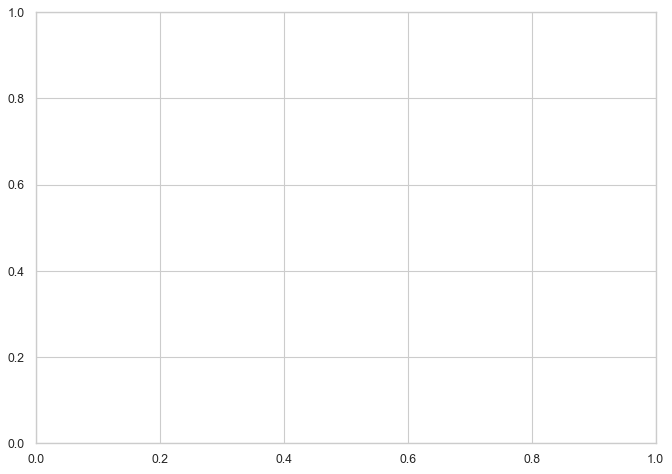

In [42]:

model_names = ['GaussianNB', 'KNeighborsClassifier', 'LogisticRegression', 'RandomForestClassifier', 'SVC']
test_accuracies = [test_accuracy, test_accuracy_knn, test_accuracy_lr, test_accuracy_rf, test_accuracy_svm]

# plotting all the test accuracies
plt.figure(figsize=(10, 7), dpi=80)
sns.barplot(x=model_names, y=test_accuracies, palette='viridis', shade=True)
plt.xlabel('Model', fontsize=15, weight='bold', labelpad=15)
plt.ylabel('Test Accuracy', fontsize=15, weight='bold', labelpad=15)
plt.title('Comparison of Test Accuracies for Different Models', fontsize=18, weight='bold', pad=15)
plt.ylim(0, 1)
for i in range(len(model_names)):
    plt.text(i, test_accuracies[i], f'{test_accuracies[i]:.4f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


/Users/thomasguerin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


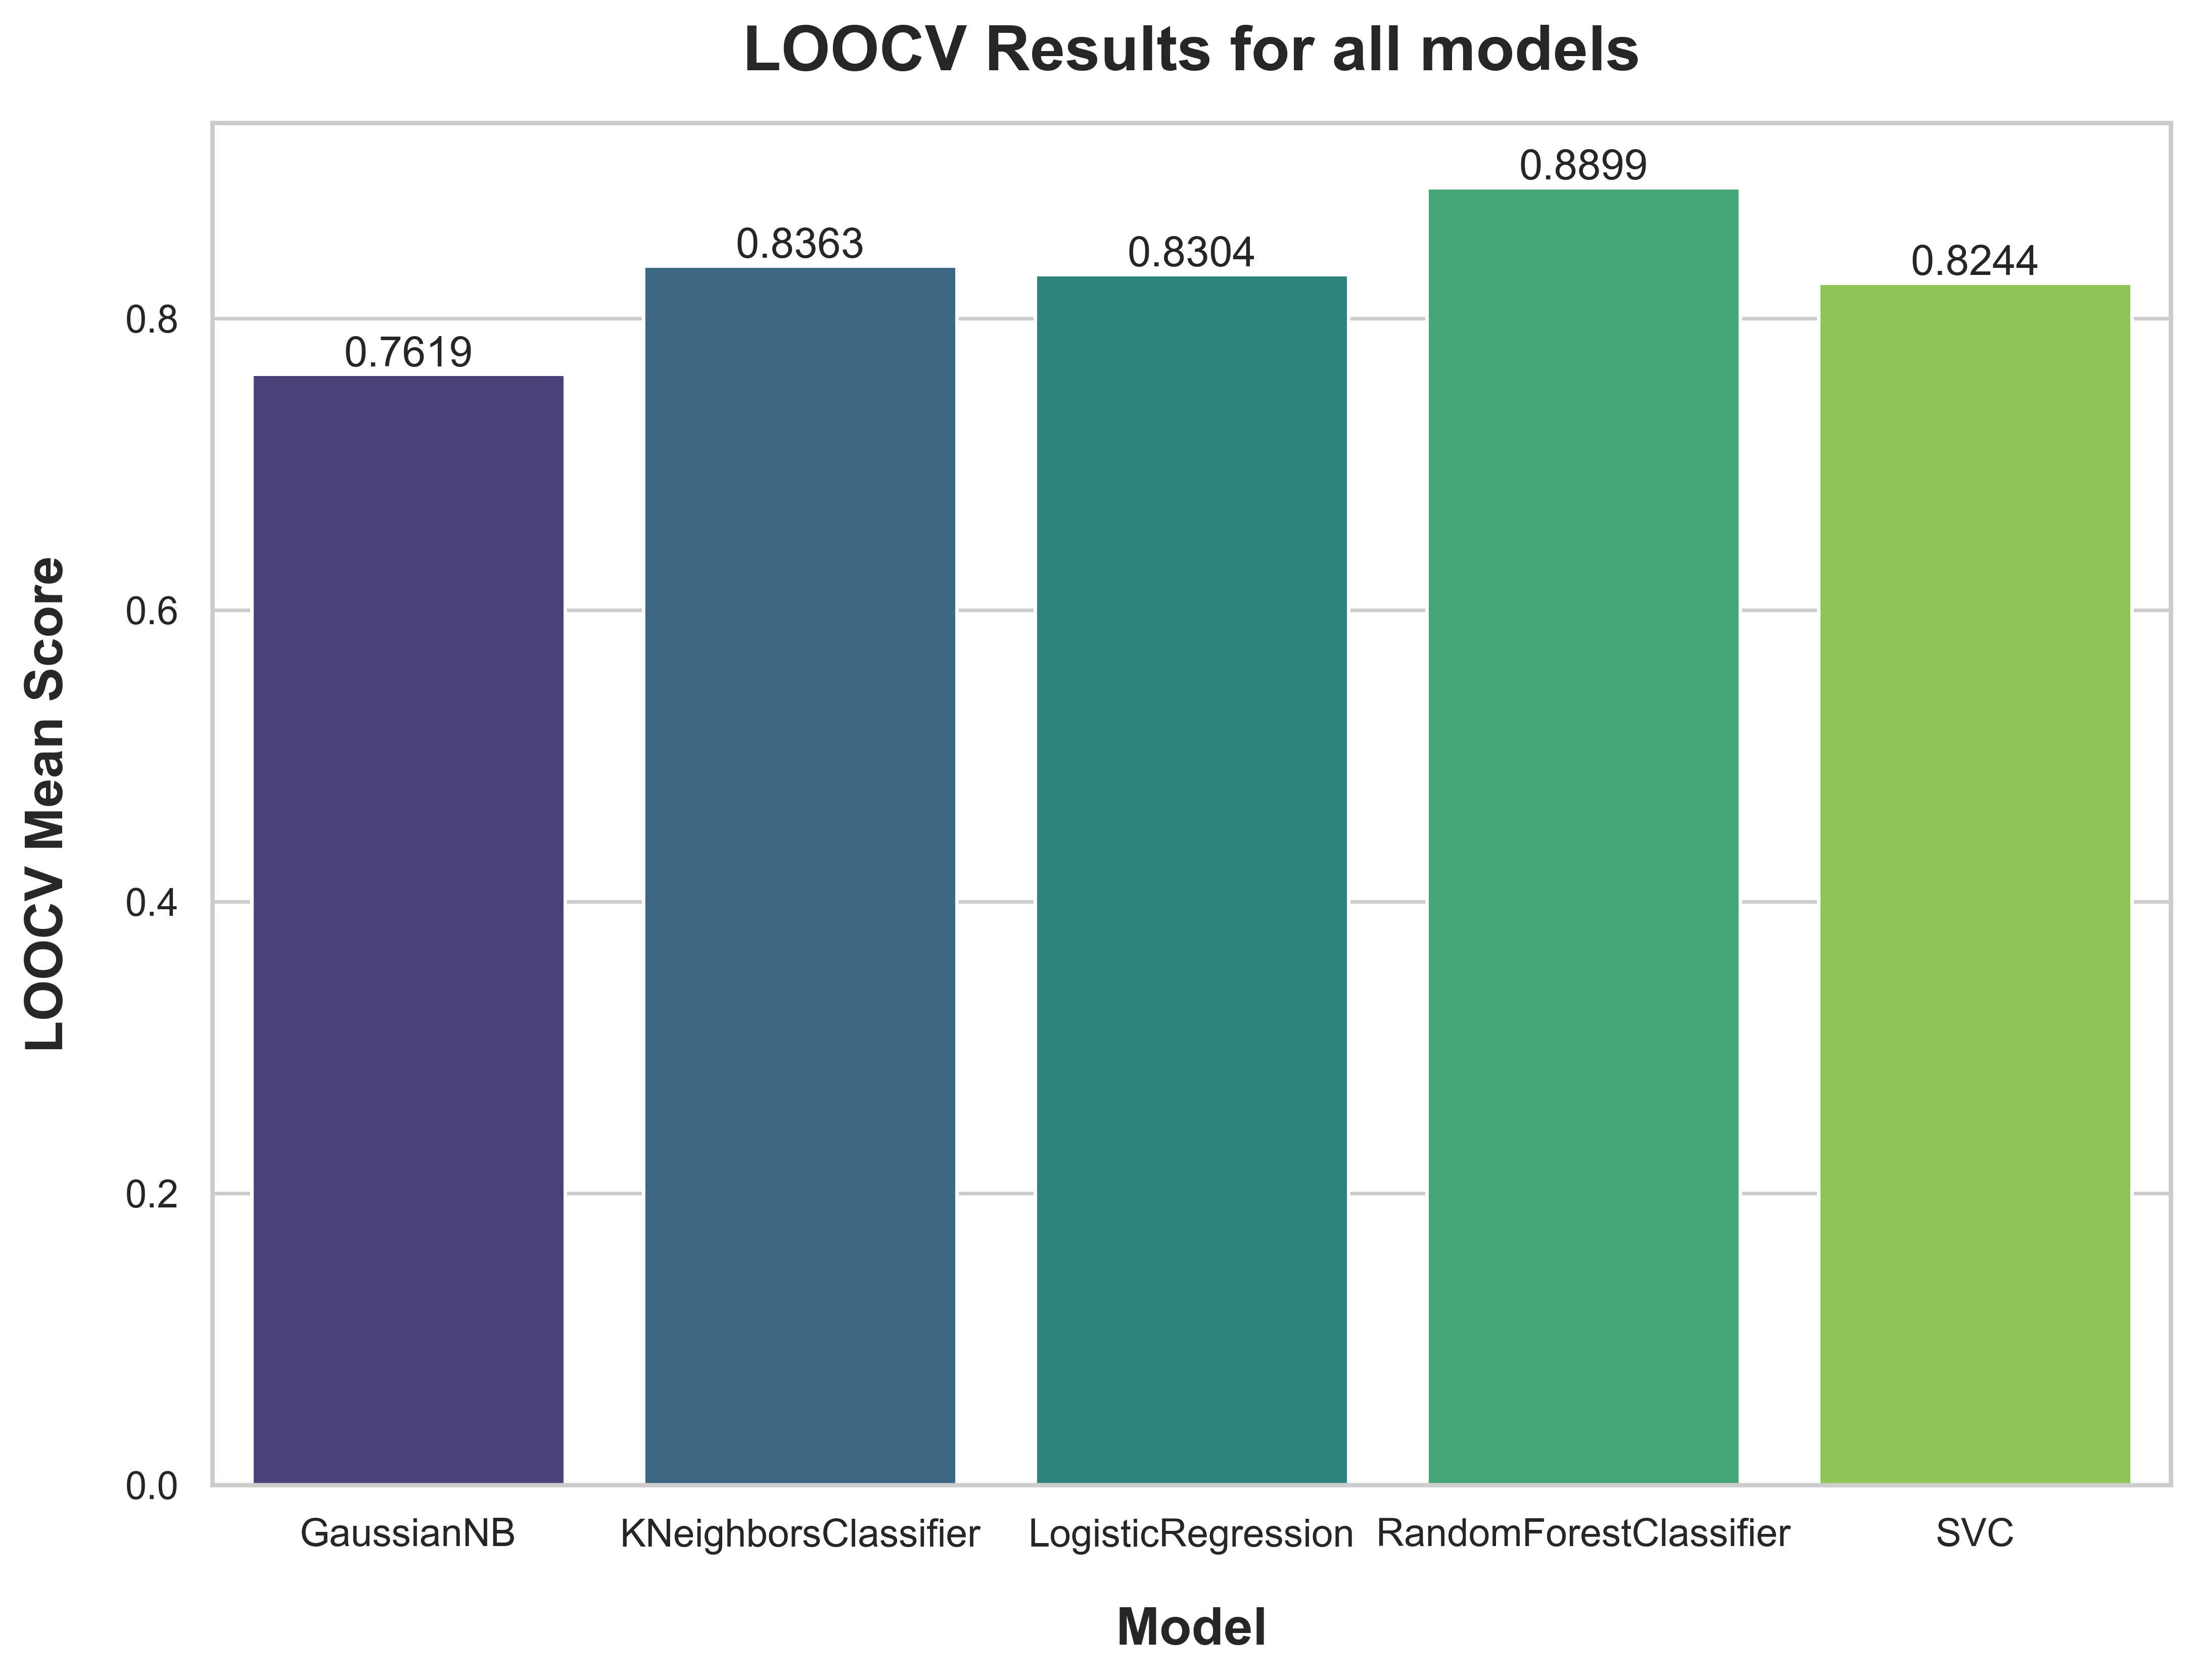

In [49]:

model_names = ['GaussianNB', 'KNeighborsClassifier', 'LogisticRegression', 'RandomForestClassifier', 'SVC']

loocv_mean_scores = [loocv_mean_score_bayes, loocv_mean_score_knn, loocv_mean_score_lr, loocv_mean_score_rf, loocv_mean_score]

fig, ax = plt.subplots(figsize=(10, 7), dpi=500)

sns.barplot(x=model_names, y=loocv_mean_scores, palette='viridis') 
plt.xlabel('Model', fontsize=15, weight='bold', labelpad=15)
plt.ylabel('LOOCV Mean Score', fontsize=15, weight='bold', labelpad=15)
plt.title('LOOCV Results for all models', fontsize=18, weight='bold', pad=15)
for i in range(len(model_names)):
    plt.text(i, loocv_mean_scores[i], f'{loocv_mean_scores[i]:.4f}', ha='center', va='bottom')
plt.show()


[-0.02047609016220775, 0.07887086580998526, 0.015125342321466229, 0.14851485148514854, -0.008931957025489767]


/Users/thomasguerin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


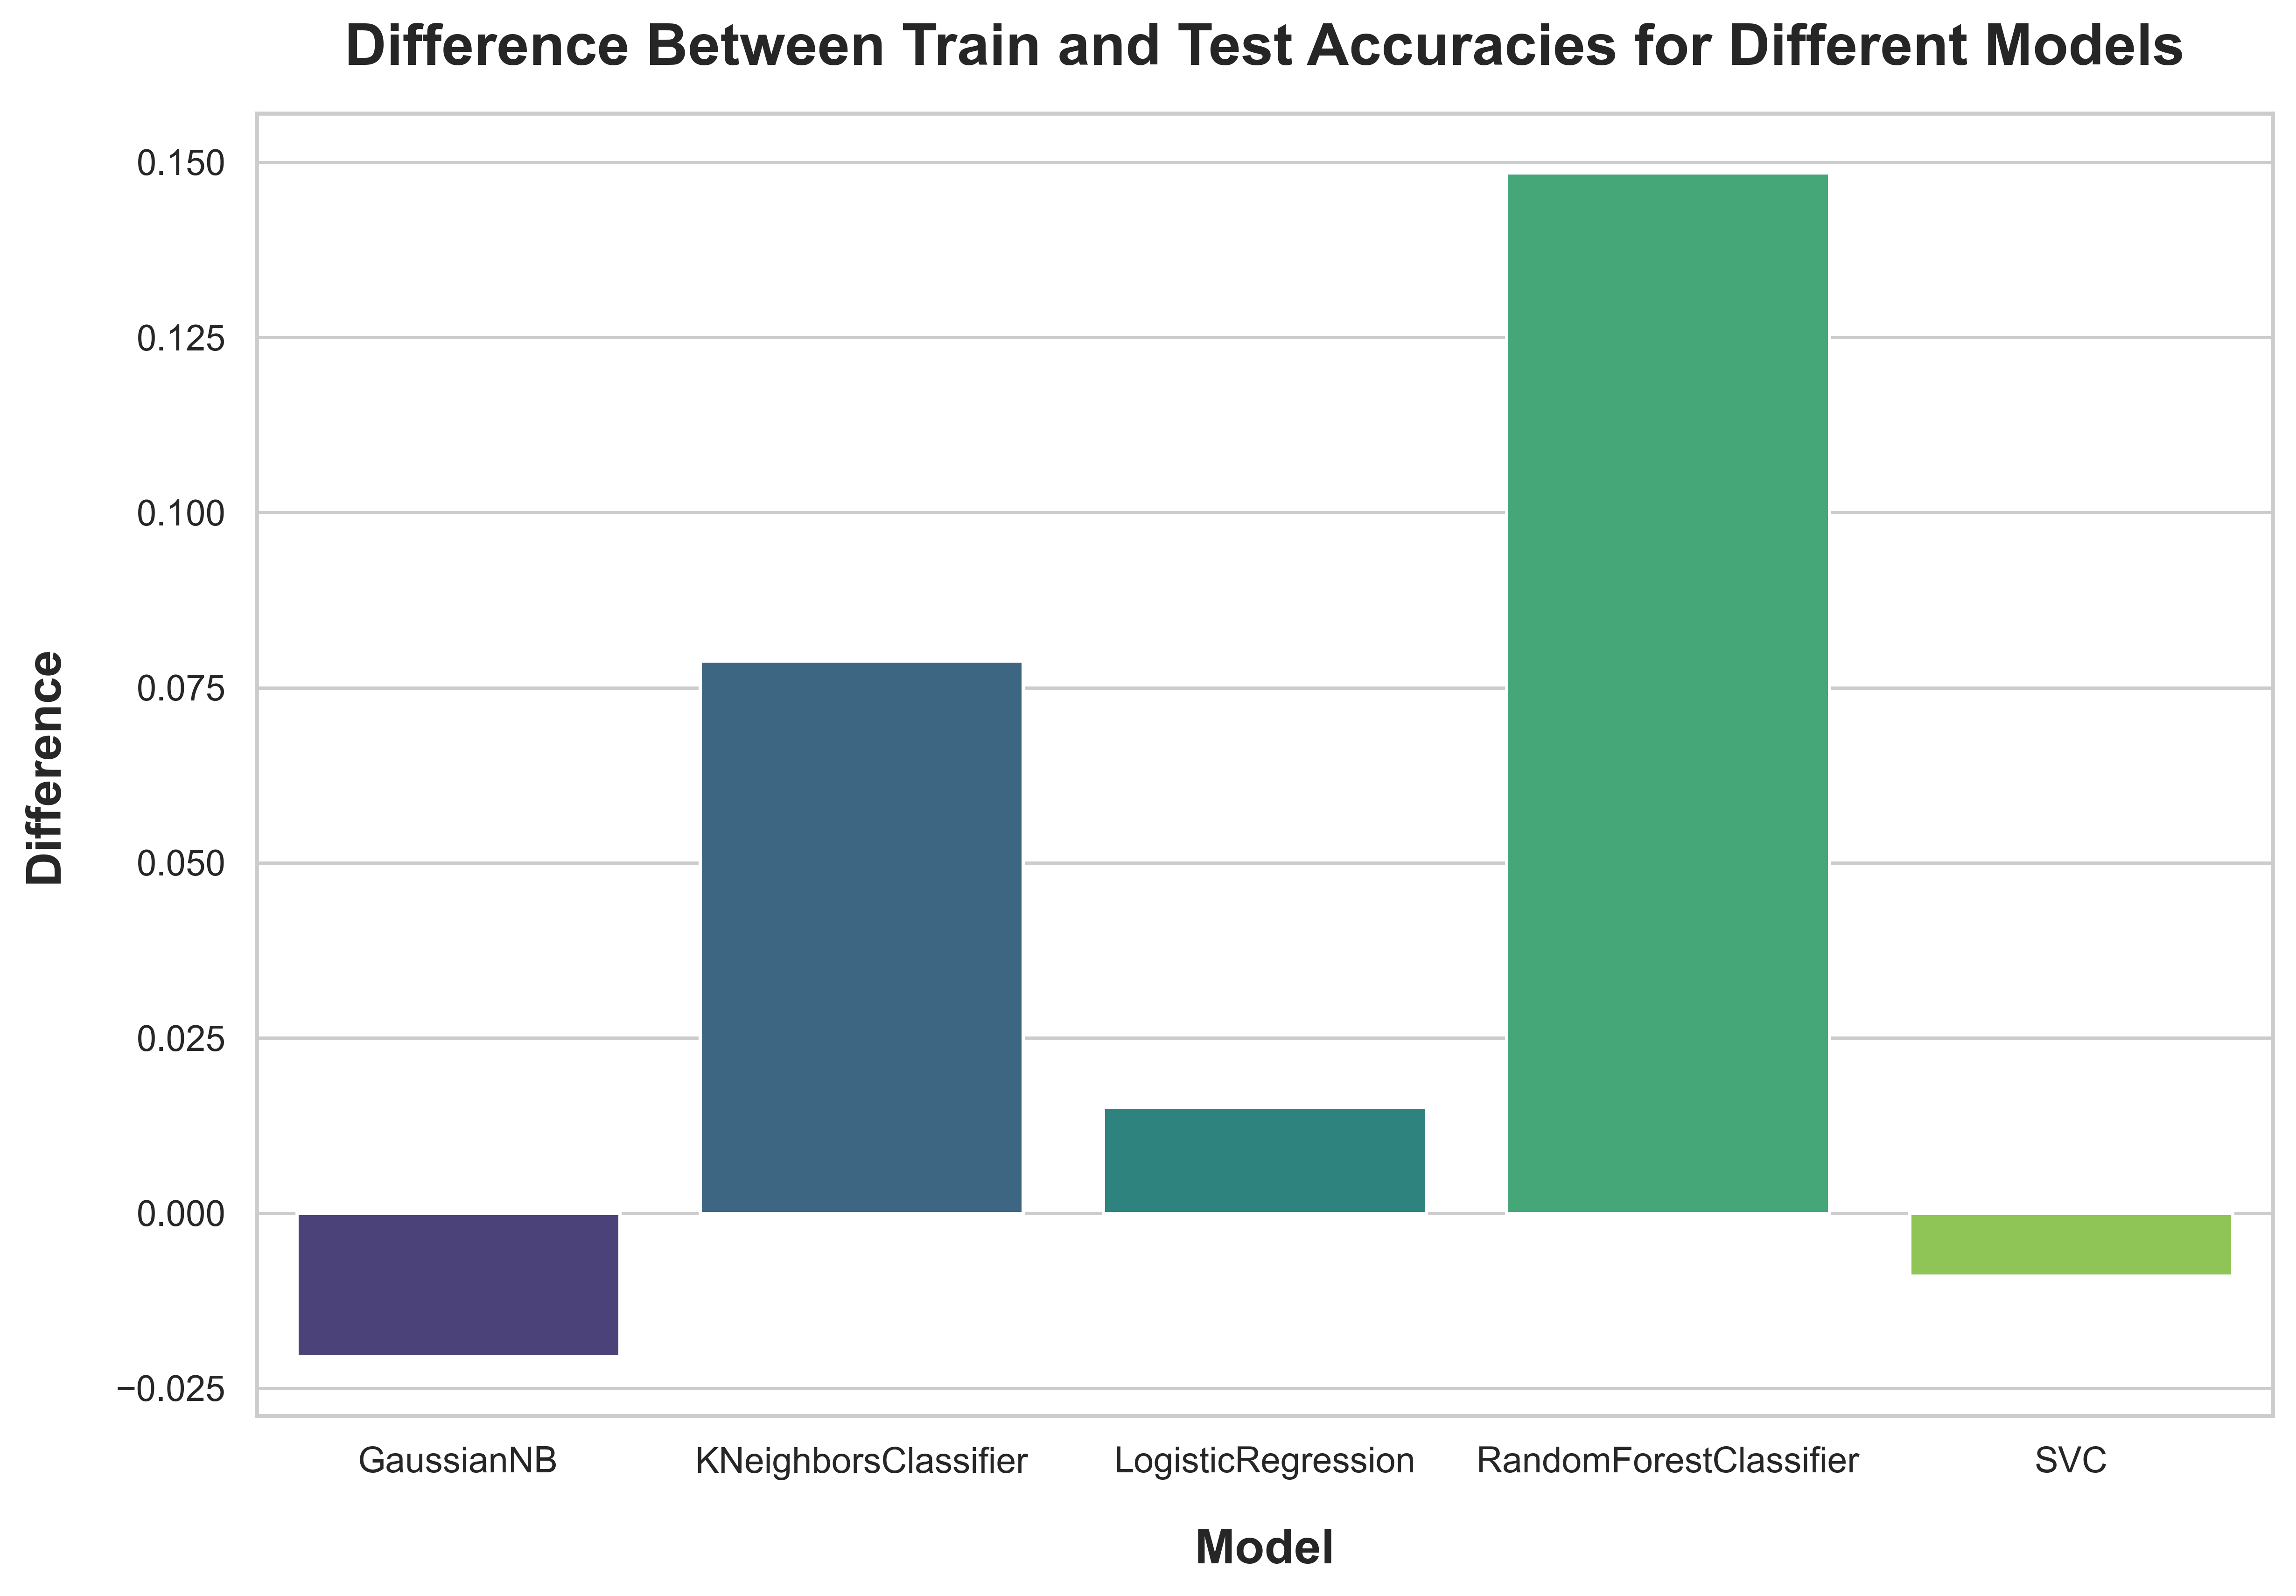

In [48]:
# plotting teh difference between train and test for each of the models

model_names = ['GaussianNB', 'KNeighborsClassifier', 'LogisticRegression', 'RandomForestClassifier', 'SVC']
train_accuracies = [train_accuracy_bayes, train_accuracy_knn, train_accuracy_lr, train_accuracy_rf, train_accuracy_svm]
test_accuracies = [test_accuracy_bayes, test_accuracy_knn, test_accuracy_lr, test_accuracy_rf, test_accuracy_svm]

differences = [train_accuracies[i] - test_accuracies[i] for i in range(len(model_names))]
print(differences)

plt.figure(figsize=(10, 7), dpi=500)
sns.barplot(x=model_names, y=differences, palette='viridis')
plt.xlabel('Model', fontsize=15, weight='bold', labelpad=15)
plt.ylabel('Difference', fontsize=15, weight='bold', labelpad=15)
plt.title('Difference Between Train and Test Accuracies for Different Models', fontsize=18, weight='bold', pad=15)
plt.tight_layout()
plt.show()